# SVM Classifier

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import collections
import pandas as pd
import os
import sys
from sklearn.svm import SVC
from util import *

sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [14]:
def svm(data_set, c_values=(1.0,), kernel_values=('rbf',), trainning_sizes=(-1,)):
	x_train, y_train, x_test, y_test = get_data(data_set=data_set)
	kernel_values = list(kernel_values)
	c_values = list(c_values)
	data = []
	data_dict = {}
	for c in c_values:
		data_dict[c] = {}
		for kernel in kernel_values:
			data_dict[c][kernel] = {}
			for train_limit in trainning_sizes:
				clf = SVC(C=c, kernel=kernel)
				clf.fit(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]).ravel())
				train_score = clf.score(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]))
				test_score = clf.score(X=x_test, y=y_test.ravel())
				data.append((test_score, train_score, c, kernel, train_limit))
				data_dict[c][kernel][train_limit] = {
					'score': test_score,
					'train_score': train_score
				}
	data_frame = pd.DataFrame(data, columns=["score", "train_score", "c", "kernel", "train_limit"])
	data_dict_indexes = {
		'c': 0,
		'kernel': 1,
		'train_limit': 2,
		'score_type': 3
	}
	return data_frame, data_dict, data_dict_indexes

def run(data_set_name):
	if data_set_name == "gender":
		df, dd, ddi = svm(
			data_set_name,
			c_values=[0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 1. , 2.],
			kernel_values=["rbf", "linear", "poly", "sigmoid"],
			trainning_sizes=range(500, 2001, 500)
		)
	elif data_set_name == "creditcard":
		df, dd, ddi = svm(
			data_set_name,
			c_values=[0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 1. , 2.],
			kernel_values=["rbf", "linear", "poly", "sigmoid"],
			trainning_sizes=range(1000, 11001, 2500)
		)
	else:
		print("unknow dataset:", data_set_name)
		exit(1)
	if not os.path.exists("../stats"):
		os.makedirs("../stats")
	df.to_csv(path_or_buf="../stats/svm_" + data_set_name + ".csv")
	with open("../stats/svm_" + data_set_name + "_dict.pikle", 'wb') as handle:
		pickle.dump(dd, handle, protocol=pickle.HIGHEST_PROTOCOL)
	with open("../stats/svm_" + data_set_name + "_dict_indexes.pikle", 'wb') as handle:
		pickle.dump(ddi, handle, protocol=pickle.HIGHEST_PROTOCOL)

# run("gender")
# run("creditcard")

Selected data set is gender with 4998 data (train: 3750 , test: 1248 )
Selected data set is creditcard with 213837 data (train: 213605 , test: 232 )


## Gender Dataset

In [15]:
data_set_name = "gender"
with open("../stats/svm_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/svm_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

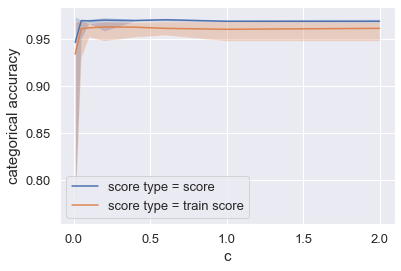

In [16]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
    filters=[(ddi['kernel'], ['linear', 'poly'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

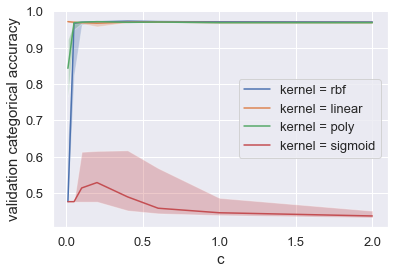

In [17]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['score'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

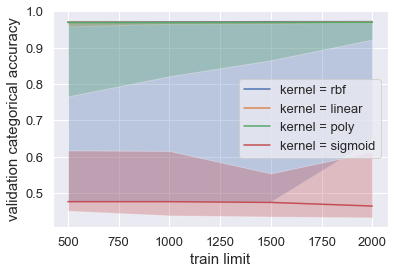

In [18]:
x_arg_name = 'train_limit'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['score'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

    kernel score_type      mean    median       std       min       max
0      rbf      score  0.910006  0.970753  0.152007  0.476763  0.976763
1   linear      score  0.969201  0.969551  0.002573  0.958333  0.973558
2     poly      score  0.953350  0.968750  0.046270  0.766026  0.972756
3  sigmoid      score  0.488957  0.476763  0.052042  0.433494  0.617788
    kernel   score_type      mean    median       std    min       max
0      rbf  train_score  0.907359  0.964000  0.139696  0.502  0.972667
1   linear  train_score  0.962224  0.961833  0.005663  0.950  0.970500
2     poly  train_score  0.943729  0.959750  0.044212  0.764  0.966000
3  sigmoid  train_score  0.506354  0.502000  0.051871  0.450  0.639500


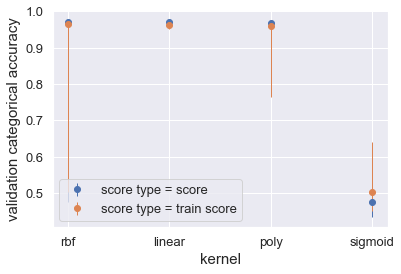

In [19]:
x_arg_name = 'kernel'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=None
)
plt.figure()
for a, d in cd.items():
	print(d)
	plt.errorbar(d.get(x_arg_name),d.get('median'), yerr=[d.get('median')-d.get('min'), d.get('max')-d.get('median')], label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '), fmt='o', elinewidth=1)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

## Credit-Card Dataset

In [20]:
data_set_name = "creditcard"
with open("../stats/svm_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/svm_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

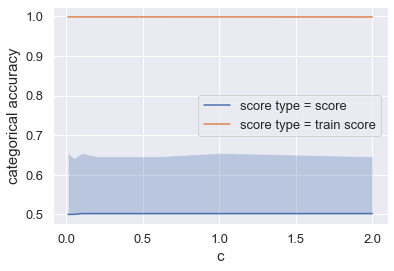

In [21]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['kernel'], ['linear', 'poly'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

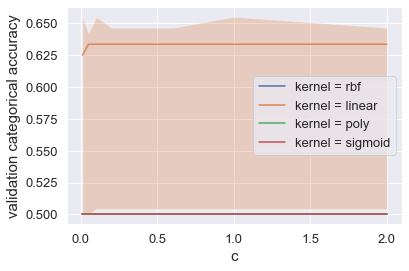

In [22]:
x_arg_name = 'c'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['score'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

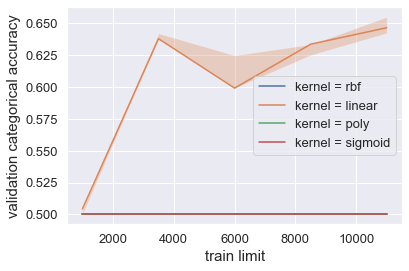

In [23]:
x_arg_name = 'train_limit'
y_arg_name = 'score_type'
z_arg_name = 'kernel'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['score'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

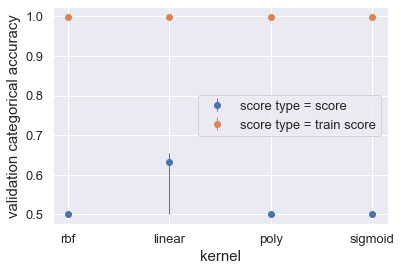

In [24]:
x_arg_name = 'kernel'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=None
)
plt.figure()
for a, d in cd.items():
	plt.errorbar(d.get(x_arg_name),d.get('median'), yerr=[d.get('median')-d.get('min'), d.get('max')-d.get('median')], label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '), fmt='o', elinewidth=1)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/svm_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()